### In this notebook we will visualize the estimated Decision-Model parameters by fitting it over the clinical data having subjects of 3 clases :

- Amphetamine users (N = 38)

- Heroin users (N = 43)

- Healthy controls (N = 48)

The dataset is obtained from the following work by Woo-Young Ahn et al : https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2014.00849/full

In [1]:
import pandas as pd 


In [2]:
df1 = pd.read_csv(r"C:\Users\mehul\RL-for-IGT\Decision-model\Results\IGT_Biomarkers_MonteCarlo_n_iter = 10,000.csv")
df_avg1 = (
    df1
    .groupby("Group", as_index=False)
    .mean(numeric_only=True)
    
)

In [3]:
df_avg1

,Group,Subject,NLL,Alpha_Limbic,Decay,Loss_Aversion,PFC_Temp,Limbic_Temp,Arbitration_Rate,Temp_Ratio
0,Amphetamine,229.000000,129.930230,0.263765,0.652650,1.169505,16.614360,5.231774,0.308617,4.021131
1,Control,206.312500,130.080958,0.258792,0.630433,1.282532,16.835781,4.960626,0.250731,6.396247
2,Heroin,207.418605,127.807950,0.283315,0.656150,0.580490,15.719843,4.399335,0.229882,5.450651


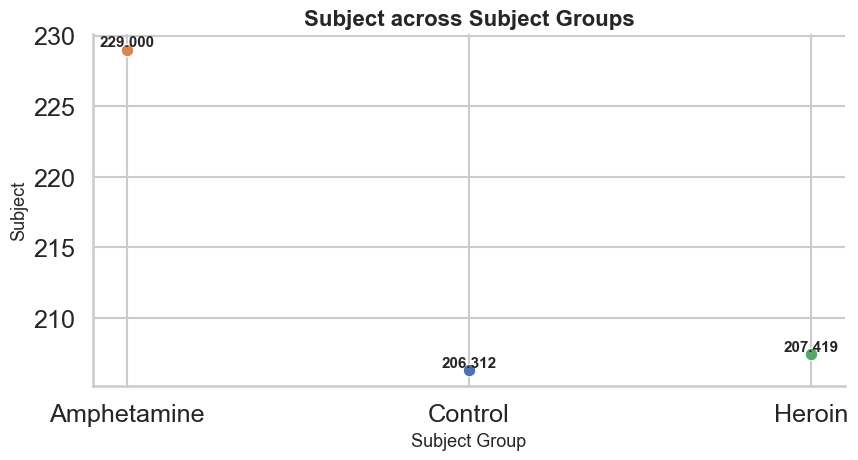

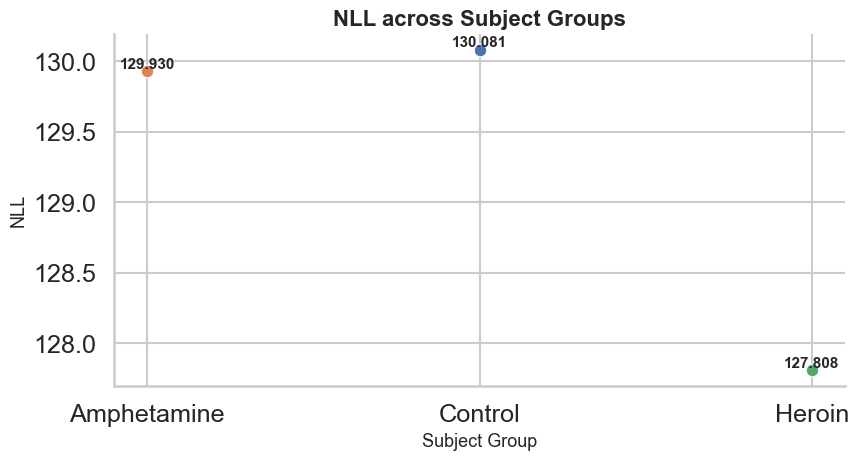

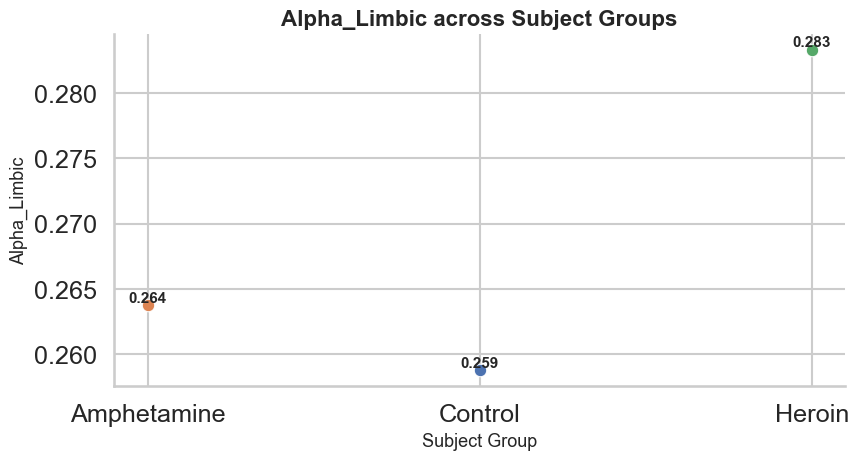

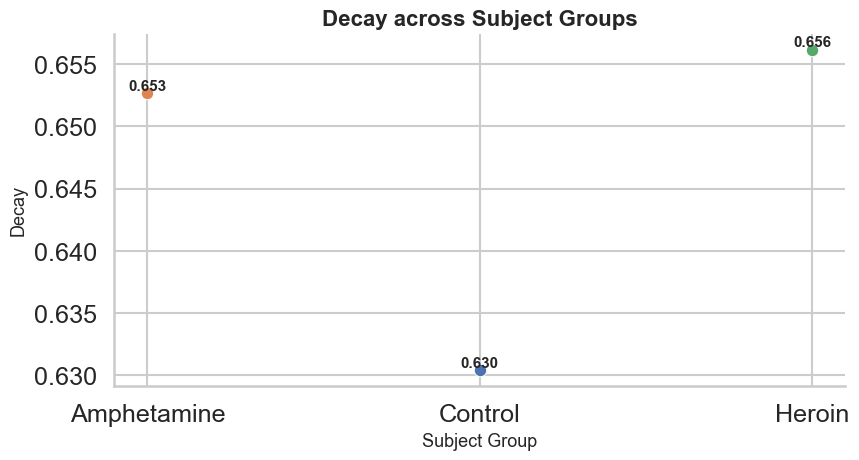

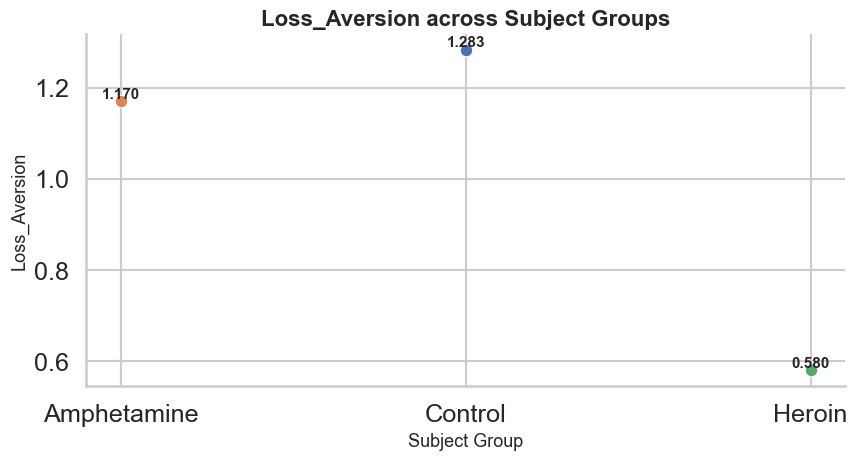

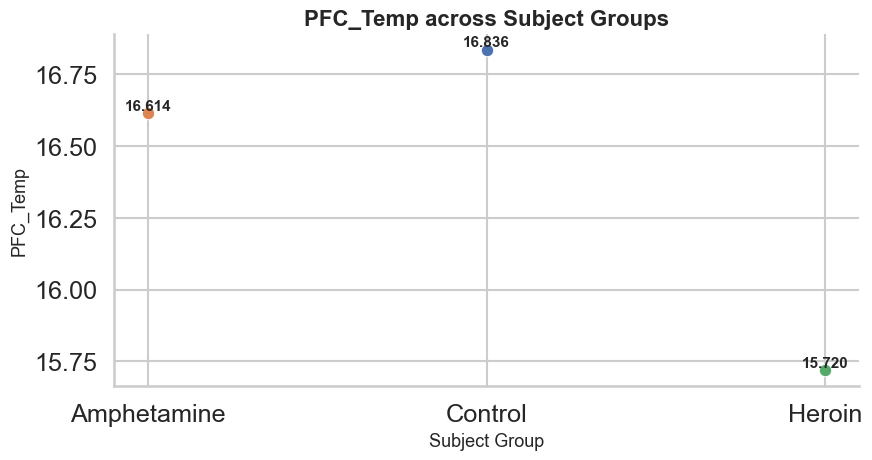

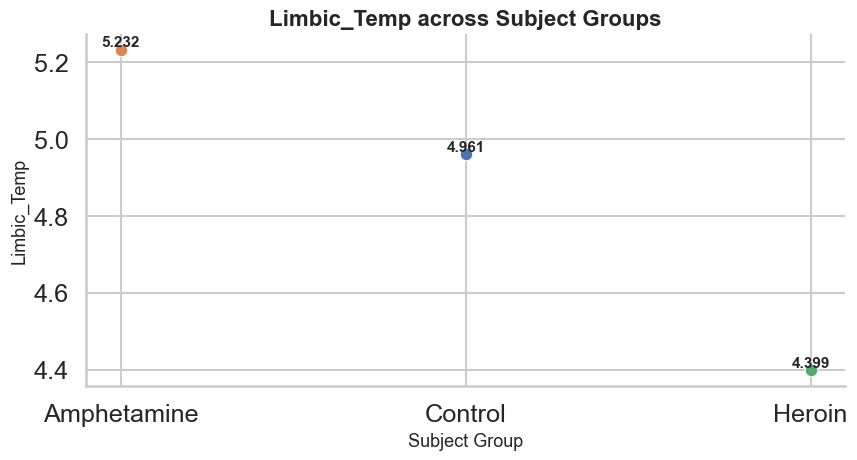

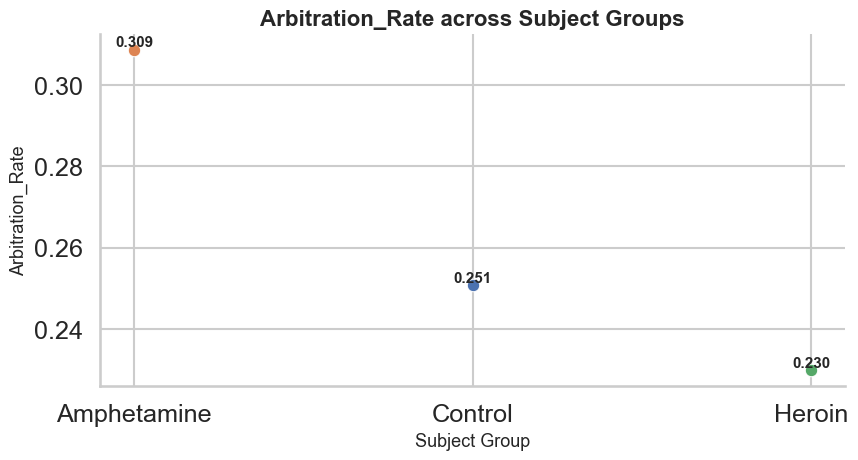

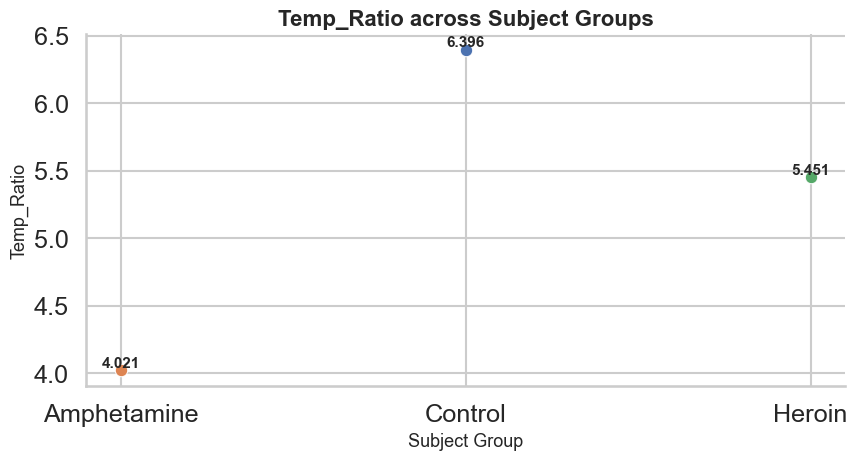

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Styling ---
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

# Order of categorical axis
group_order = ["Control", "Amphetamine", "Heroin"]

# Designer color palette
palette = {
    "Control": "#4C72B0",
    "Amphetamine": "#DD8452",
    "Heroin": "#55A868"
}

features = [
    "Subject",
    "NLL",
    "Alpha_Limbic",
    "Decay",
    "Loss_Aversion",
    "PFC_Temp",
    "Limbic_Temp",
    "Arbitration_Rate",
    "Temp_Ratio"
]

for feature in features:

    plt.figure(figsize=(9, 5))

    ax = sns.lineplot(
        data=df_avg1,
        x="Group",
        y=feature,
        hue="Group",
        palette=palette,
        marker="o",
        markersize=9,
        linewidth=3,
        legend=False
    )

    # ----- Designer ticks at exact values -----
    values = df_avg1.set_index("Group").loc[group_order, feature].values
    for x, y in zip(group_order, values):
        ax.text(
            x,
            y,
            f"{y:.3f}",
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

    # Labels and title
    plt.title(f"{feature} across Subject Groups", fontsize=16, weight="bold")
    plt.xlabel("Subject Group", fontsize=13)
    plt.ylabel(feature, fontsize=13)

    # Improve aesthetics
    sns.despine()
    plt.tight_layout()
    plt.show()


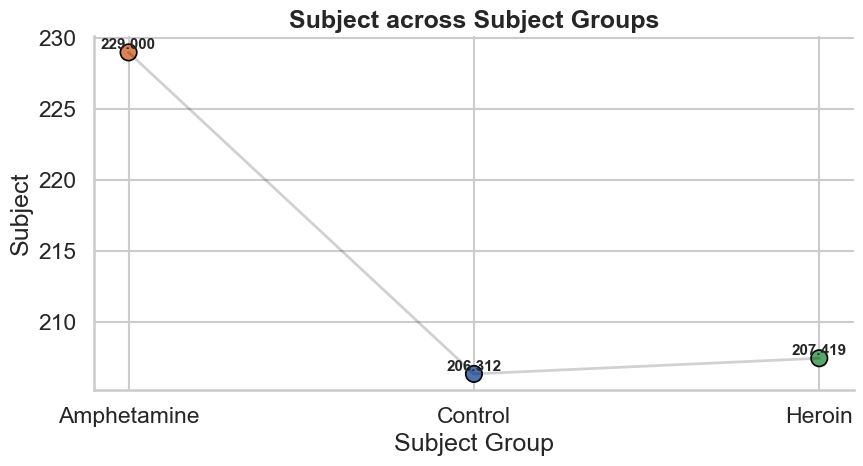

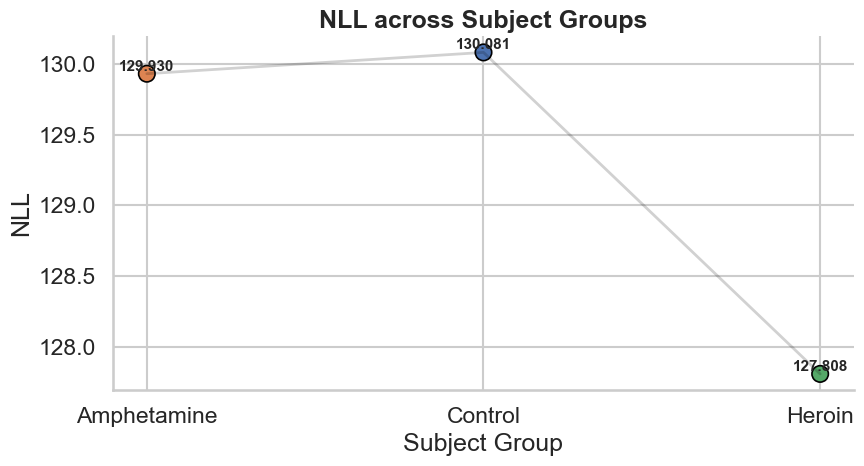

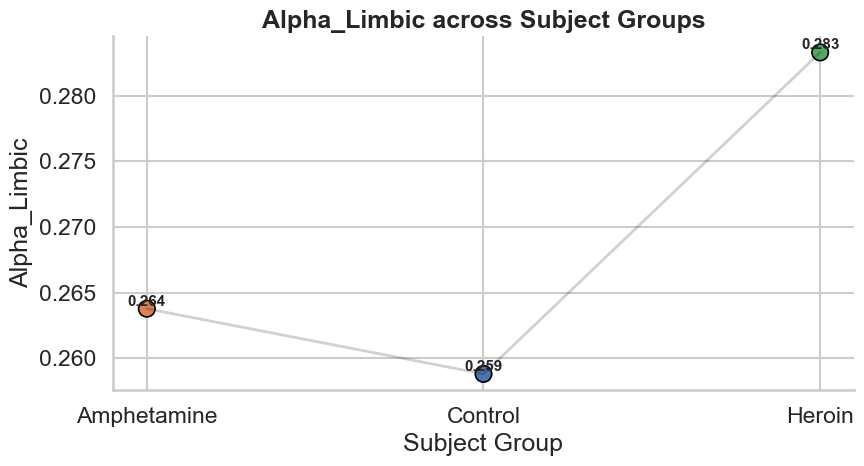

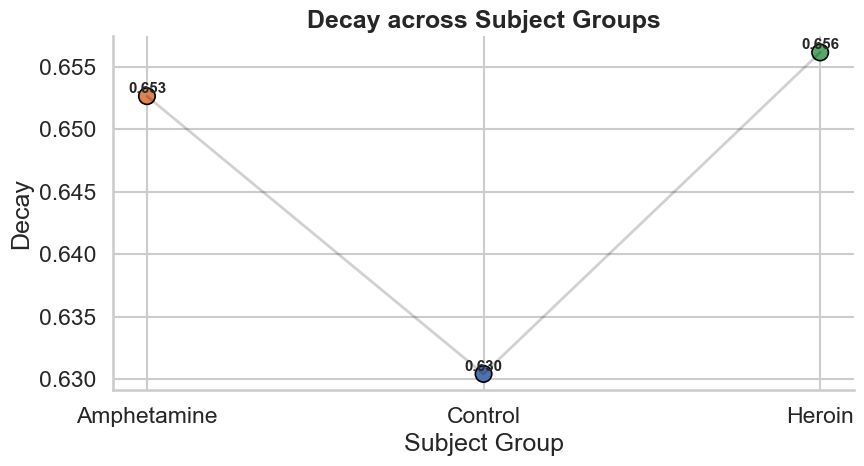

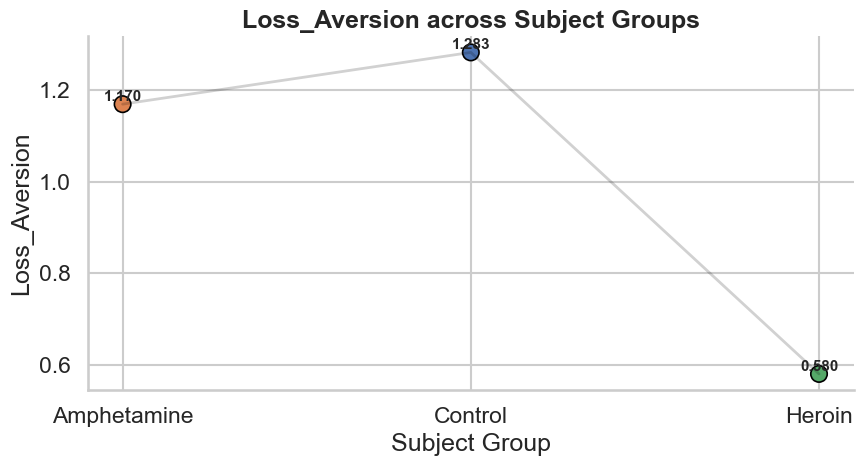

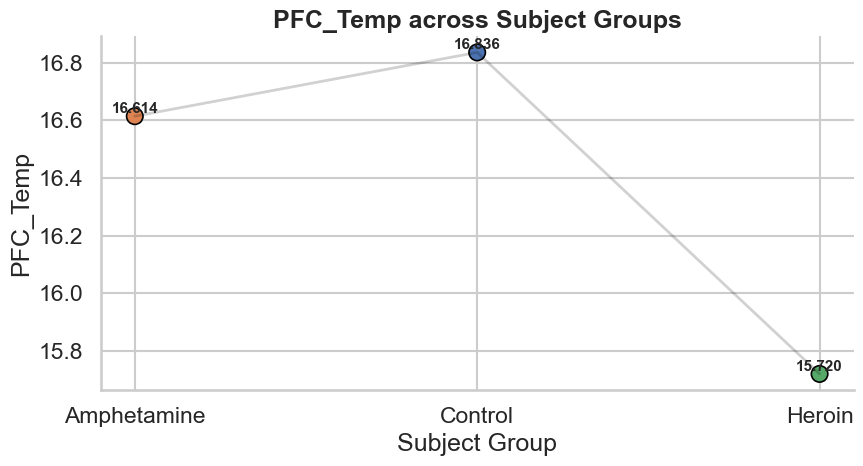

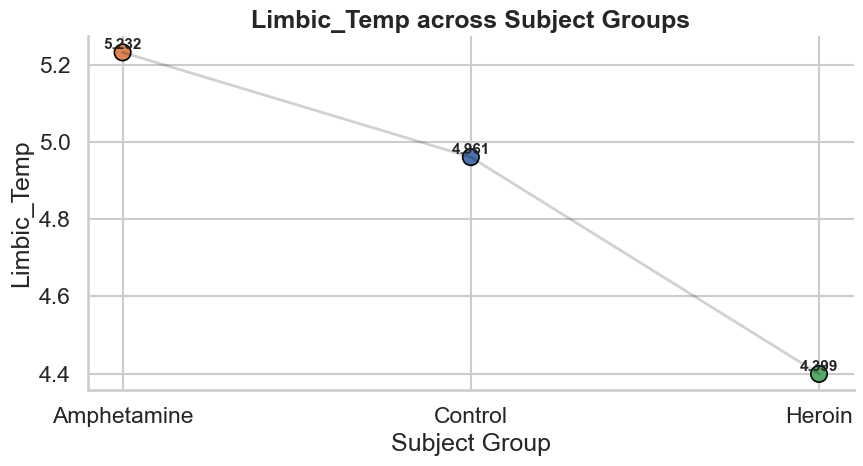

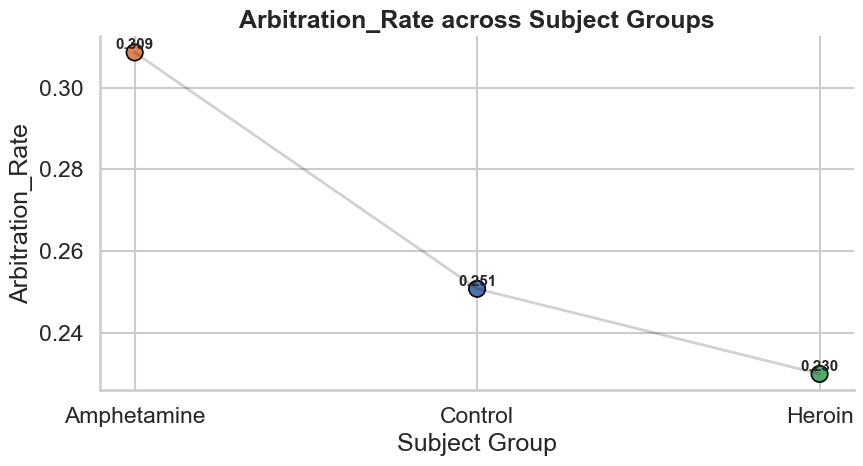

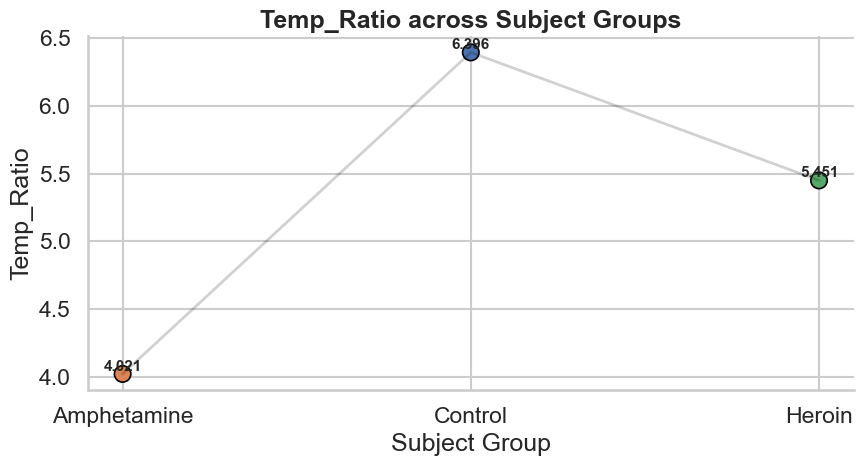

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk")

group_order = ["Control", "Amphetamine", "Heroin"]

palette = {
    "Control": "#4C72B0",
    "Amphetamine": "#DD8452",
    "Heroin": "#55A868"
}

features = [
    "Subject",
    "NLL",
    "Alpha_Limbic",
    "Decay",
    "Loss_Aversion",
    "PFC_Temp",
    "Limbic_Temp",
    "Arbitration_Rate",
    "Temp_Ratio"
]

for feature in features:

    plt.figure(figsize=(9, 5))

    # ---- Faint connecting line ----
    sns.lineplot(
        data=df_avg1,
        x="Group",
        y=feature,
        estimator=None,
        sort=False,
        color="black",
        alpha=0.18,          # faint line
        linewidth=2,
        legend=False
    )

    # ---- Bold markers on top ----
    ax = sns.scatterplot(
        data=df_avg1,
        x="Group",
        y=feature,
        hue="Group",
        palette=palette,
        s=140,               # marker size
        edgecolor="black",
        linewidth=1.2,
        legend=False
    )

    # ---- Exact value labels ----
    values = df_avg1.set_index("Group").loc[group_order, feature].values
    for x, y in zip(group_order, values):
        ax.text(x, y, f"{y:.3f}",
                ha='center', va='bottom',
                fontsize=11, weight="bold")

    plt.title(f"{feature} across Subject Groups", weight="bold")
    plt.xlabel("Subject Group")
    plt.ylabel(feature)

    sns.despine()
    plt.tight_layout()
    plt.show()
